In [1]:
from tensorflow.keras.models import load_model

2024-05-28 09:15:51.458366: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

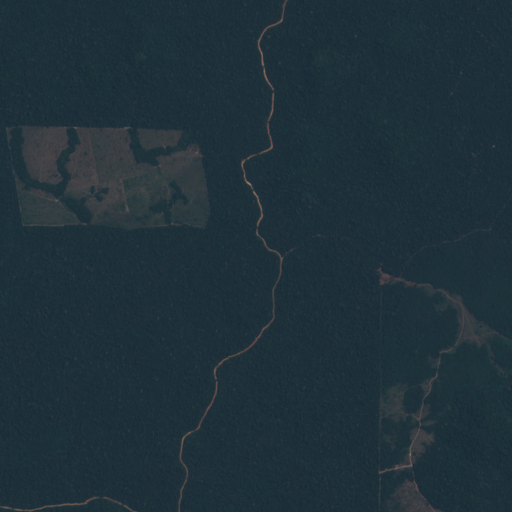

In [42]:
img_path = 'attention-mechanism-unet/dataset/training/images/Amazon_1110.tiff_25.tiff'
img = Image.open(img_path)
img

In [43]:
img_array = np.array(img)/255.0
img_array.shape

(512, 512, 3)

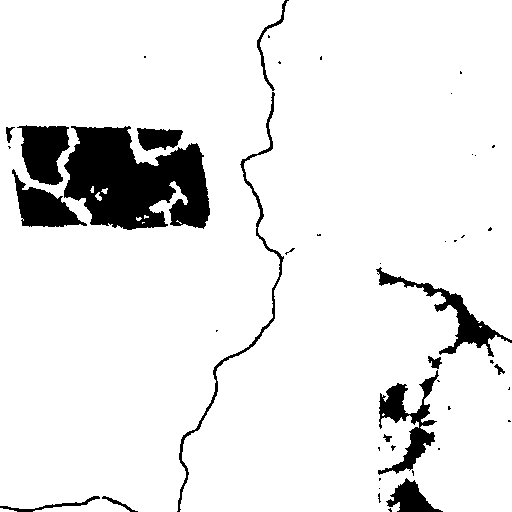

In [44]:
mask_path = 'attention-mechanism-unet/dataset/training/masks/Amazon_1110.tiff_25.png'
mask = Image.open(mask_path)
mask

In [16]:
def resize_image(im, input_array):
    input_shape = input_array.shape

    x = (input_shape[0] % 512)
    y = (input_shape[1] % 512)

    output1 = np.pad(input_array[:,:,0], [[0, 512-x], [0, 512-y]], mode='constant', constant_values=0)
    output2 = np.pad(input_array[:,:,1], [[0, 512-x], [0, 512-y]], mode='constant', constant_values=0)
    output3 = np.pad(input_array[:,:,2], [[0, 512-x], [0, 512-y]], mode='constant', constant_values=0)
    output = np.zeros((output1.shape[0], output1.shape[1], 3))
    output[:,:,0] = output1
    output[:,:,1] = output2
    output[:,:,2] = output3

    return output


In [17]:
preprocessed_img = resize_image(img, np.array(img))

In [18]:
preprocessed_img.shape

(1024, 1024, 3)

In [24]:
model = load_model('attention-mechanism-unet/models/unet-attention-3d.hdf5')

In [25]:
model.summary()

Model: "model_39"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_40 (InputLayer)          [(1, 512, 512, 3)]   0           []                               
                                                                                                  
 conv2d_1142 (Conv2D)           (1, 512, 512, 16)    448         ['input_40[0][0]']               
                                                                                                  
 activation_1034 (Activation)   (1, 512, 512, 16)    0           ['conv2d_1142[0][0]']            
                                                                                                  
 conv2d_1143 (Conv2D)           (1, 512, 512, 16)    2320        ['activation_1034[0][0]']        
                                                                                           

                                                                  'activation_1041[0][0]']        
                                                                                                  
 concatenate_167 (Concatenate)  (1, 64, 64, 256)     0           ['conv2d_transpose_136[0][0]',   
                                                                  'multiply_124[0][0]']           
                                                                                                  
 conv2d_1155 (Conv2D)           (1, 64, 64, 128)     295040      ['concatenate_167[0][0]']        
                                                                                                  
 activation_1046 (Activation)   (1, 64, 64, 128)     0           ['conv2d_1155[0][0]']            
                                                                                                  
 conv2d_1156 (Conv2D)           (1, 64, 64, 128)     147584      ['activation_1046[0][0]']        
          

 conv2d_1165 (Conv2D)           (1, 256, 256, 32)    18464       ['concatenate_169[0][0]']        
                                                                                                  
 activation_1054 (Activation)   (1, 256, 256, 32)    0           ['conv2d_1165[0][0]']            
                                                                                                  
 conv2d_1166 (Conv2D)           (1, 256, 256, 32)    9248        ['activation_1054[0][0]']        
                                                                                                  
 activation_1055 (Activation)   (1, 256, 256, 32)    0           ['conv2d_1166[0][0]']            
                                                                                                  
 conv2d_transpose_139 (Conv2DTr  (1, 512, 512, 16)   2064        ['activation_1055[0][0]']        
 anspose)                                                                                         
          

In [26]:
np.expand_dims(preprocessed_img, axis=0).shape

(1, 1024, 1024, 3)

In [32]:
prediction = model.predict(np.expand_dims(img_array, axis=0))

1/1 [==============================] - 0s 426ms/step


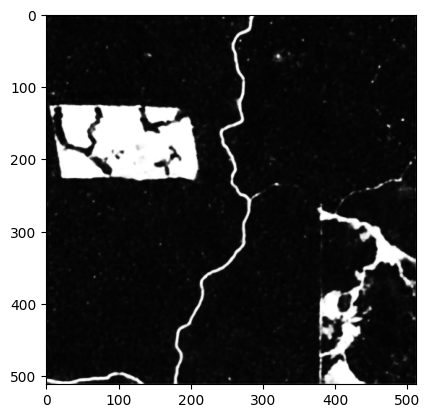

In [46]:
plt.imshow(prediction[0], cmap='gray')